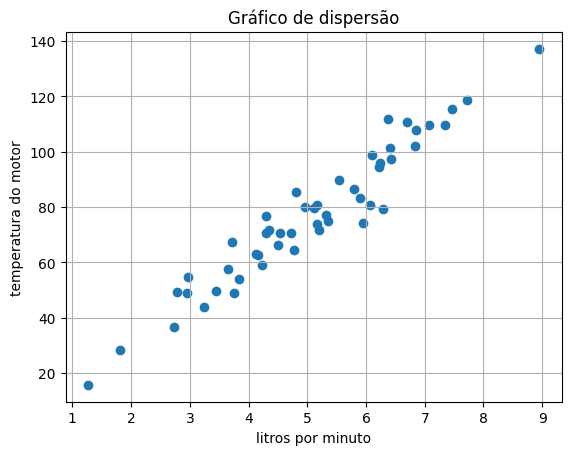


Intercepto, beta0 = 0.72138
Coeficiente angular, beta1 = 15.09656
R-quadrado, r2 = 0.92843
Residuo de lstsq, residuo = 2156.76756
Residuo calculado, rss = 2156.76756

121.5


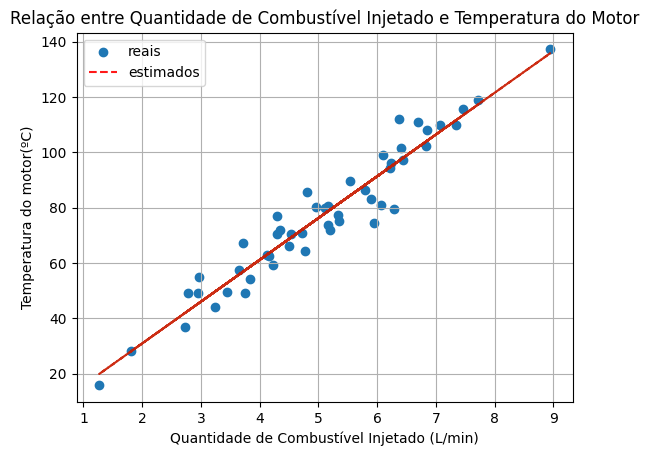

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

litros, motor = np.load('combustivel_e_temperatura.npy')

plt.scatter(litros, motor)
plt.xlabel('litros por minuto')
plt.ylabel('temperatura do motor')
plt.title('Gráfico de dispersão')
plt.grid()
plt.show()

# solução np.lstsq
Litros = np.vstack((np.ones(len(litros)), litros)).T
betas, res, _, _ = np.linalg.lstsq(Litros, motor, rcond=None)
beta0, beta1 = betas
residuo = res[0]

# Calculando a previsão do modelo
yPrev = beta1 * litros + beta0

# Calculando R-Quadrado
yMedio = np.mean(motor)
tss = np.sum((motor - yMedio) ** 2) # Soma total dos quadrados
rss = np.sum((motor - yPrev) ** 2) # residuo dos quadrados
r2 = 1 - rss / tss
print(f'\nIntercepto, {beta0 = :.5f}')
print(f'Coeficiente angular, {beta1 = :.5f}')
print(f'R-quadrado, {r2 = :.5f}')
print(f'Residuo de lstsq, {residuo = :.5f}')
print(f'Residuo calculado, {rss = :.5f}\n')

#comparação com pontos preditos pelo modelo
plt.scatter(litros, motor, label='reais')
plt.plot(litros, yPrev,'r--', alpha = 0.9, label='estimados')
plt.plot(litros, beta0 + beta1 * litros, 'g--', alpha = 0.2)
plt.xlabel('Quantidade de Combustível Injetado (L/min)')
plt.ylabel('Temperatura do motor(ºC)')
plt.title('Relação entre Quantidade de Combustível Injetado e Temperatura do Motor')
plt.legend()
plt.grid()

resultado = beta1 * 8 + beta0
print(np.round(resultado,1))